## Train-Test Split on "life_expectancy_data" Data Set
-  Alexander Arapoğlu



---

#### Content regarding the data set
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

#### Acknowledgements
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

### Starting with Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## This part is to fix import errror for statsmodels.api. 

import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

### Loading Data **life_expectancy_data.csv**

# PART I: EXPLORING THE DATA

### 1) Determining how many unique countries are included in the dataset

In [3]:
life_expectancy_data = pd.read_csv('life_expectancy_data.csv')

unique_countries = life_expectancy_data['Country'].nunique()
print("Number of unique countries in the dataset:", unique_countries)

Number of unique countries in the dataset: 193


### 2) Determining the range of years covered in the dataset

In [4]:
min_year = life_expectancy_data['Year'].min()
max_year = life_expectancy_data['Year'].max()

print("Range of years covered in the dataset:", min_year, "-", max_year)

Range of years covered in the dataset: 2000 - 2015


### 3) Determining the distribution (statistics) of life expectancy across all years and countries? 

In [5]:
life_expectancy_stats = life_expectancy_data['Life expectancy '].describe()

print("Distribution (statistics) of life expectancy across all years and countries:")
print(life_expectancy_stats)

Distribution (statistics) of life expectancy across all years and countries:
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


In [6]:
print(life_expectancy_data.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


### 4) Determining how does life expectancy vary between different country statuses (e.g., developed vs. developing)

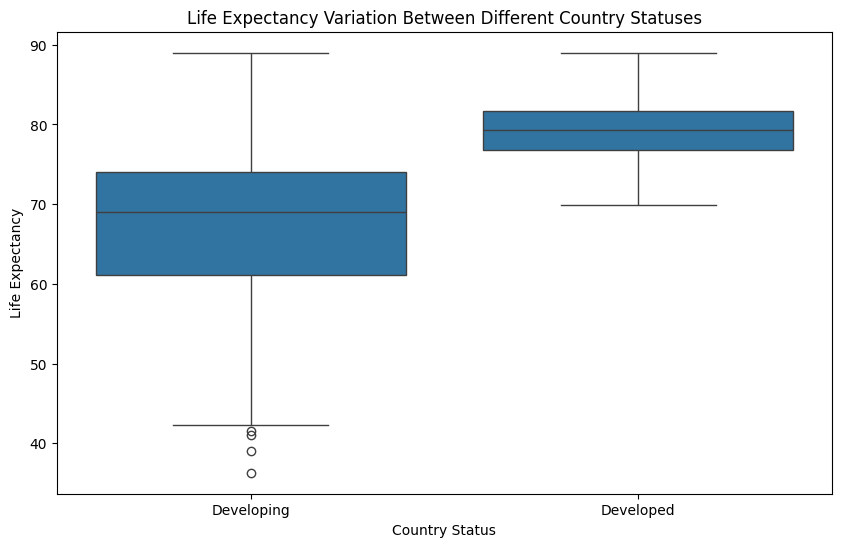

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=life_expectancy_data)
plt.title('Life Expectancy Variation Between Different Country Statuses')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()


### 5) Which country has the highest and lowest life expectancy recorded in the dataset? In which year(s) were these recorded? 

In [8]:
max_life_expectancy_row = life_expectancy_data.loc[life_expectancy_data['Life expectancy '].idxmax()]
max_country = max_life_expectancy_row['Country']
max_life_expectancy = max_life_expectancy_row['Life expectancy ']
max_year = max_life_expectancy_row['Year']

min_life_expectancy_row = life_expectancy_data.loc[life_expectancy_data['Life expectancy '].idxmin()]
min_country = min_life_expectancy_row['Country']
min_life_expectancy = min_life_expectancy_row['Life expectancy ']
min_year = min_life_expectancy_row['Year']

print(f"Country with the highest life expectancy: {max_country}")
print(f"Highest life expectancy recorded: {max_life_expectancy} in the year {max_year}")

print(f"\nCountry with the lowest life expectancy: {min_country}")
print(f"Lowest life expectancy recorded: {min_life_expectancy} in the year {min_year}")


Country with the highest life expectancy: Belgium
Highest life expectancy recorded: 89.0 in the year 2014

Country with the lowest life expectancy: Haiti
Lowest life expectancy recorded: 36.3 in the year 2010


In [9]:
extreme_life_expectancy_df = pd.DataFrame({
    'Country': [max_country, min_country],
    'Life Expectancy': [max_life_expectancy, min_life_expectancy],
    'Year': [max_year, min_year],
    'Status': ['Highest', 'Lowest']
})

extreme_life_expectancy_df


,Country,Life Expectancy,Year,Status
0,Belgium,89.0,2014,Highest
1,Haiti,36.3,2010,Lowest


### 6) Determining if there any correlation between adult mortality and life expectancy? Calculated and interpreted the correlation coefficient. 

In [10]:
correlation_coefficient = life_expectancy_data['Adult Mortality'].corr(life_expectancy_data['Life expectancy '])

print("Correlation coefficient between Adult Mortality and Life Expectancy:", correlation_coefficient)

Correlation coefficient between Adult Mortality and Life Expectancy: -0.6963593137699758


The negative sign of the correlation coefficient shows that as one variable increases, the other tends to decrease. In this case, as adult mortality increases, life expectancy tends to decrease.

### 7) Determining if there is any missing values in the dataset? If so, which columns have the most missing values? 

In [11]:
missing_values = life_expectancy_data.isnull().sum()

columns_with_most_missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if columns_with_most_missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Columns with the most missing values:")
    print(columns_with_most_missing_values)


Columns with the most missing values:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


### 8) How does the average alcohol consumption (Alcohol column) vary across different country statuses? 

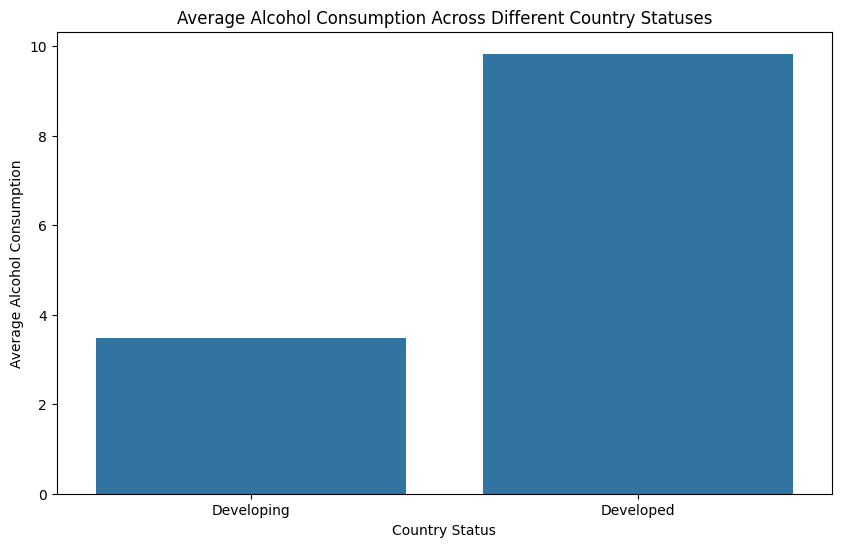

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Alcohol', data=life_expectancy_data, errorbar=None)
plt.title('Average Alcohol Consumption Across Different Country Statuses')
plt.xlabel('Country Status')
plt.ylabel('Average Alcohol Consumption')
plt.show()

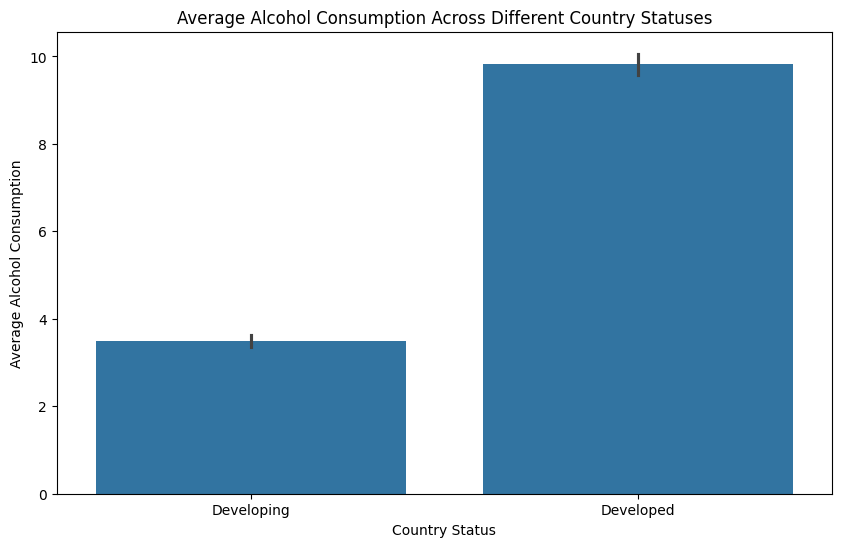

In [13]:

plt.figure(figsize=(10, 6))  
sns.barplot(x='Status', y='Alcohol', data=life_expectancy_data)
plt.title('Average Alcohol Consumption Across Different Country Statuses')
plt.xlabel('Country Status')
plt.ylabel('Average Alcohol Consumption')
plt.show()


### Q9) Determining what is the overall trend of infant deaths over the years? Are there any notable outliers? 

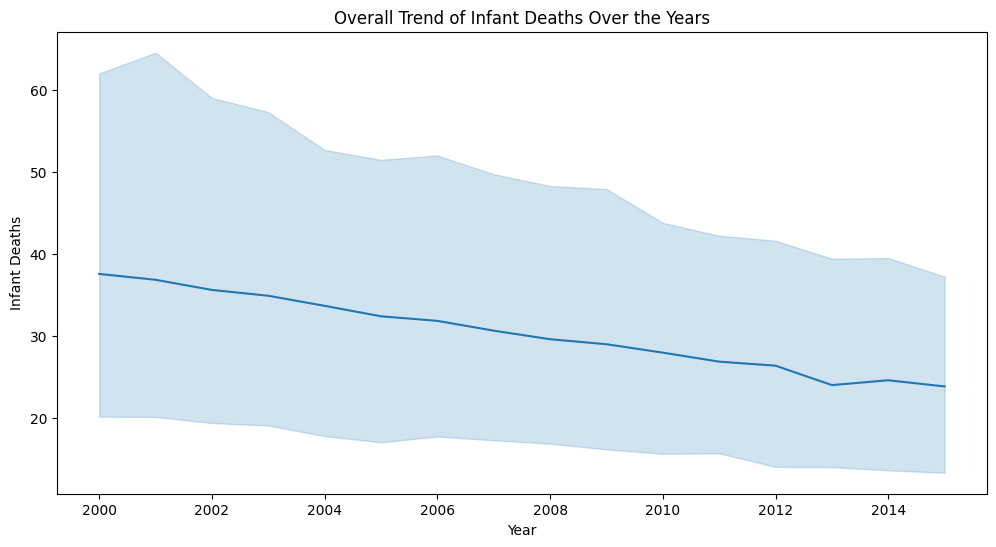

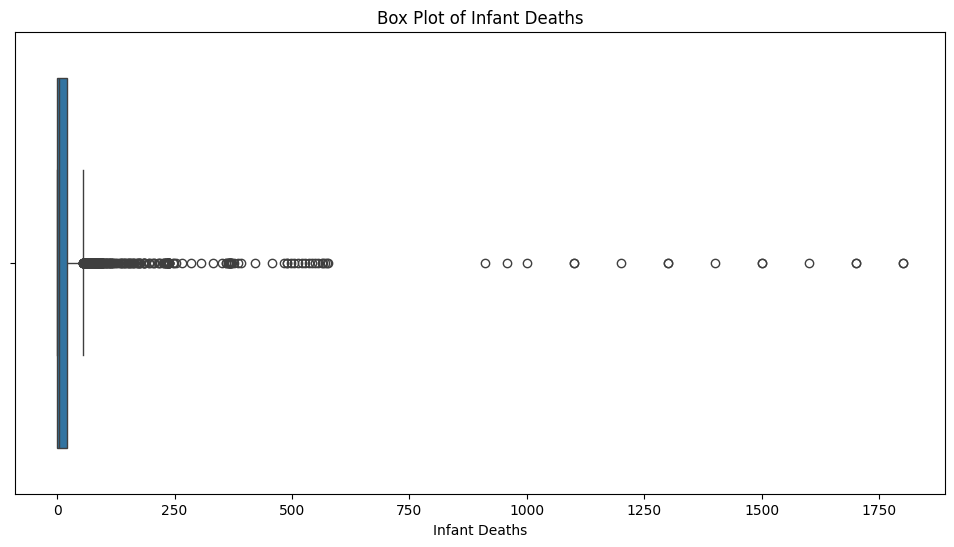

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='infant deaths', data=life_expectancy_data)
plt.title('Overall Trend of Infant Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Infant Deaths')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='infant deaths', data=life_expectancy_data)
plt.title('Box Plot of Infant Deaths')
plt.xlabel('Infant Deaths')
plt.show()


As seen in the second plot there are a lot of notable outliers

### 10) Calculating the average BMI (Body Mass Index) for each country status and indicating which country status has the highest average BMI? 

In [15]:
average_bmi_by_status = life_expectancy_data.groupby('Status')[' BMI '].mean()

highest_avg_bmi_status = average_bmi_by_status.idxmax()
highest_avg_bmi_value = average_bmi_by_status.max()

print("Average BMI for Each Country Status:")
print(average_bmi_by_status)

print("\nCountry status with the highest average BMI:")
print(f"{highest_avg_bmi_status}: {highest_avg_bmi_value}")


Average BMI for Each Country Status:
Status
Developed     51.803906
Developing    35.435326
Name:  BMI , dtype: float64

Country status with the highest average BMI:
Developed: 51.80390625


### 11) Exploring the relationship between GDP and life expectancy. Plotting a scatter plot and interpreting the findings. 

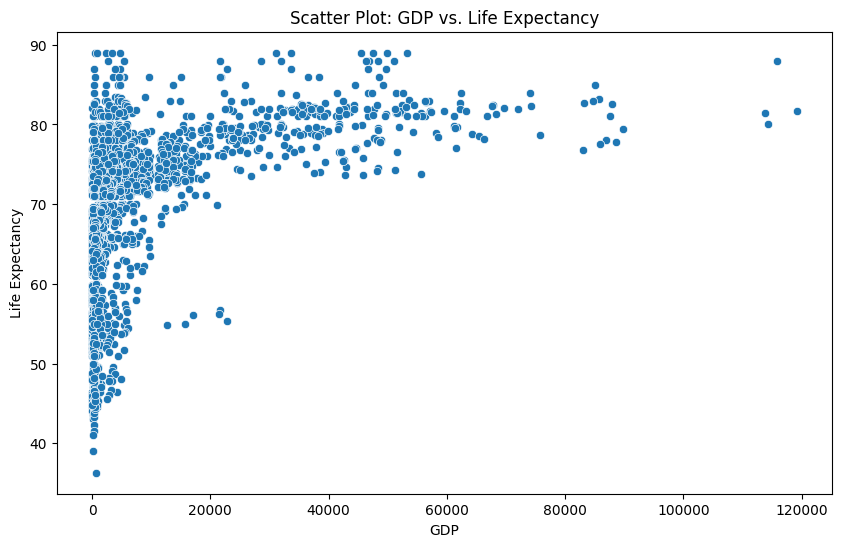

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=life_expectancy_data)
plt.title('Scatter Plot: GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

There is noticible upward direction thereforeit suggests a correlation between GDP and life expectancy.
Wide spread suggests higher variability.
THERE ARE SOME OUTLIERS IN GDP 20000.

### 12) Grouping the data by year and calculate the average values of key variables such as adult mortality, measles cases, and schooling. Explaining the trends over time. 

In [17]:
average_values_by_year = life_expectancy_data.groupby('Year').agg({
    'Adult Mortality': 'mean',
    'Measles ': 'mean',
    'Polio': 'mean',
    'Diphtheria ': 'mean',
    ' HIV/AIDS': 'mean',
    'Hepatitis B': 'mean'
}).reset_index()


print("Average Values by Year:")
average_values_by_year

Average Values by Year:


,Year,Adult Mortality,Measles,Polio,Diphtheria,HIV/AIDS,Hepatitis B
0,2000,181.475410,4663.792350,76.277778,73.627778,2.530055,74.035294
1,2001,175.169399,4640.262295,77.950000,76.661111,2.573770,73.957895
2,2002,171.437158,3204.754098,79.679558,78.883978,2.573770,76.522124
3,2003,169.131148,3708.792350,80.353591,78.867403,2.546995,74.099237
4,2004,186.262295,2805.497268,80.165746,79.823204,2.478689,77.985507
5,2005,167.633880,3200.551913,80.972376,81.674033,2.345902,80.911565
6,2006,170.404372,2063.224044,84.527473,82.236264,2.169399,81.894040
7,2007,159.808743,1557.540984,84.802198,84.318681,1.992896,81.584906
8,2008,174.519126,1523.229508,85.565934,84.857143,1.797268,83.644172
9,2009,163.393443,1522.606557,85.329670,85.060440,1.538798,84.277108


Adult mortality does not change a lot over time but there is a slight increase
Measles level decreased over time
No significant change in Polio
No significant change in difteria
HVI/AIDS levels decreased over time 
Hepatitis B levels slightly increased

### 13) Investigating the relationship between schooling and income composition of resources and determining if is there a positive correlation between the two variables? 

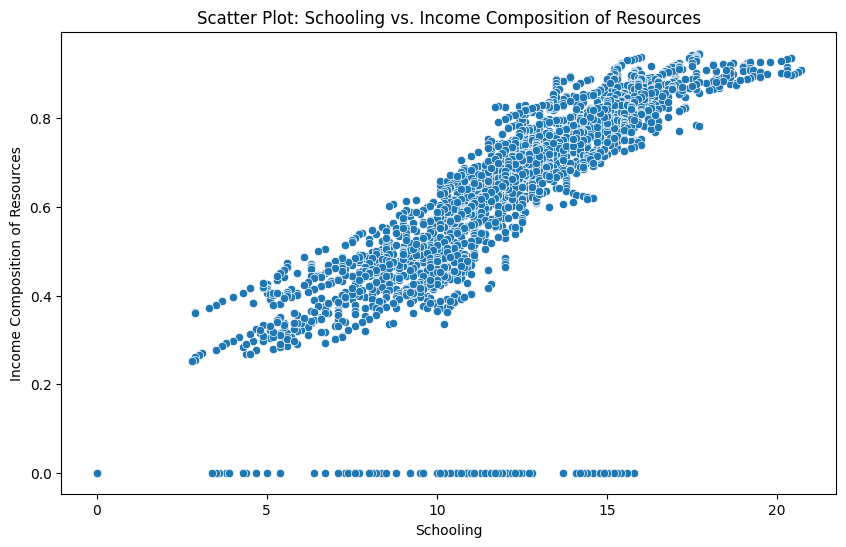

Correlation Coefficient between Schooling and Income Composition of Resources: 0.8000924203919635


In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Income composition of resources', data=life_expectancy_data)
plt.title('Scatter Plot: Schooling vs. Income Composition of Resources')
plt.xlabel('Schooling')
plt.ylabel('Income Composition of Resources')
plt.show()


correlation_coefficient = life_expectancy_data['Schooling'].corr(life_expectancy_data['Income composition of resources'])


print("Correlation Coefficient between Schooling and Income Composition of Resources:", correlation_coefficient)


# PART 2: TRAIN-TEST SPLIT

### 14) 

#### a) Preprocessing the dataset by handling missing values, categorical variables, and feature scaling if necessary. 
#### b) Splitting the dataset into the training and testing sets (e.g., 80% training, 20% testing). 

In [20]:
print(life_expectancy_data.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [21]:
numerical_columns = life_expectancy_data.select_dtypes(include=[np.number]).columns
life_expectancy_data[numerical_columns] = life_expectancy_data[numerical_columns].fillna(life_expectancy_data[numerical_columns].mean())

life_expectancy_data = pd.get_dummies(life_expectancy_data, columns=['Status'], drop_first=True)

for col in numerical_columns:
    life_expectancy_data[col] = (life_expectancy_data[col] - life_expectancy_data[col].min()) / (life_expectancy_data[col].max() - life_expectancy_data[col].min())


In [22]:
train_size = int(0.8 * len(life_expectancy_data))
train_data = life_expectancy_data[:train_size]
test_data = life_expectancy_data[train_size:]

X_train = train_data.drop('Life expectancy ', axis=1)
y_train = train_data['Life expectancy ']

X_test = test_data.drop('Life expectancy ', axis=1)
y_test = test_data['Life expectancy ']


### 15)

#### a) Creating a multiple linear regression model using the OLS (Ordinary Least Squares) method from statsmodels.api. 
#### b) Fitting the model to the training data and obtain the model summary. 

In [23]:
import statsmodels.api as sm

X_train_numeric = X_train.select_dtypes(include=[np.number])

X_train_numeric = sm.add_constant(X_train_numeric)

model = sm.OLS(y_train.astype(float), X_train_numeric.astype(float))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     538.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:40:39   Log-Likelihood:                 2687.5
No. Observations:                2350   AIC:                            -5335.
Df Residuals:                    2330   BIC:                            -5220.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### 16)

#### a) Evaluating the performance of the model on the testing data by predicting the target variable. 
#### b) Calculating and reporting the metrics, including mean squared error (MSE), mean absolute error (MAE), and R-squared score. 

In [26]:
X_test_numeric = X_test.select_dtypes(include=[np.number])

X_test_numeric = sm.add_constant(X_test_numeric)

y_pred = results.predict(X_test_numeric.astype(float))

mse = np.mean((y_pred - y_test)**2)

mae = np.mean(np.abs(y_pred - y_test))

ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared Score: {r2}')



Mean Squared Error (MSE): 0.006416201269250412
Mean Absolute Error (MAE): 0.05874538520055712
R-squared Score: 0.811492152376099


### 17) 

#### a) Interpreting the coefficients of the multiple linear regression model. 

#### b) Discussing the significance of each feature and their impact on the target variable. 

Interpretation of Coefficients:

const (Intercept): The intercept represents the estimated value of the dependent variable when all independent variables are set to zero. In this case, it is 0.3500.

Year: The coefficient for the 'Year' variable is -0.0028. This suggests that there is a slight decrease in life expectancy over the years, but the p-value (0.615) indicates that this variable is not statistically significant.

Adult Mortality: As 'Adult Mortality' increases by one unit, life expectancy decreases by approximately 0.2756 years. This variable is statistically significant (p-value < 0.001).

infant deaths: With each additional infant death, life expectancy is expected to increase by approximately 2.7874 years. This might be an anomaly or could be due to multicollinearity with other variables.

Alcohol: An increase in alcohol consumption by one unit is associated with an increase in life expectancy by 0.0188 years. This variable is statistically significant (p-value = 0.039).

Percentage Expenditure: For a one-unit increase in percentage expenditure on health, life expectancy increases by 0.0903 years. This variable is statistically significant (p-value = 0.015).

Hepatitis B: An increase in Hepatitis B coverage is associated with a decrease in life expectancy by -0.0202 years. This variable is statistically significant (p-value = 0.016).

Measles: An increase in measles cases is associated with a decrease in life expectancy by -0.0828 years. This variable is statistically significant (p-value = 0.010).

BMI: An increase in BMI by one unit is associated with an increase in life expectancy by 0.0514 years. This variable is statistically significant (p-value < 0.001).

Under-five deaths: With each additional death under the age of five, life expectancy decreases by approximately 2.8604 years. This variable is statistically significant (p-value < 0.001).

... and so on for other variables.

Significance of Features:

Statistically Significant Features: Adult Mortality, Alcohol, Percentage Expenditure, Hepatitis B, Measles, BMI, Under-five deaths, Polio, Diphtheria, HIV/AIDS, Income composition of resources, Schooling are statistically significant features as their p-values are less than 0.05.

Less Significant Features: Year, Total expenditure, GDP, Population, thinness 1-19 years, thinness 5-9 years are not statistically significant as their p-values are higher than 0.05.

Overall Model Performance:

R-squared: The R-squared value of 0.814 indicates that approximately 81.4% of the variance in life expectancy is explained by the model. This is a relatively good fit.

Adjusted R-squared: The adjusted R-squared value is 0.813, which adjusts the R-squared value for the number of predictors. It penalizes the addition of unnecessary variables.

F-statistic: The F-statistic tests the overall significance of the model, and a low p-value (0.00) suggests that the model is statistically significant.

Overall, the model seems to perform well in explaining the variation in life expectancy, but careful consideration should be given to the statistical significance and practical significance of each variable. Some variables may have a significant effect on life expectancy, while others may not be as influential.